The following notebook implements the pre-processing for the Propublica COMPAS  dataset. 

---
Some of the main techniques used here are listed below.



*   Removing duplicate rows and unavailable entries from the dataset.
*   Visualizing the features to understand the trends better.
*   Generalizing the charge descriptions(reduce categories) in order to prevent creation of large number of dummy variables on binarizing the dataset.
*   In order to better generalize the type of charges a new feature **charge category** is added







In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
import pandas as pd
df = pd.read_csv(r'/gdrive/My Drive/cox-violent-parsed_filt.csv')

df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,violent_recid,is_violent_recid,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,1,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,NaN,0,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [ ]:
lis = ['age_cat', 'sex', 'race', 'decile_score', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'is_recid']

#primary key 'id' is dropped to identify duplicate rows in df

df.drop('id', axis=1, inplace=True) 
df = df.drop_duplicates()


#feature in lis parameter are copied into df
  
df = df[lis].copy()
df = df.dropna()
  
#data rows with is_recid = -1 are dropped from df 
  
df = df[df.is_recid != -1]

#Dataframe is stored in raw_data which is used for pre_processing and visualization 
raw_data = df
raw_data.shape

(10598, 11)

the duplicate rows from the data frame **df** are dropped and 
selects the particular rows provided by the user from the dataframe in **lis**

# EXPLORATORY DATA-ANALYSIS


---



In [ ]:
raw_data.race.value_counts()

African-American    5336
Caucasian           3640
Hispanic             954
Other                582
Asian                 53
Native American       33
Name: race, dtype: int64

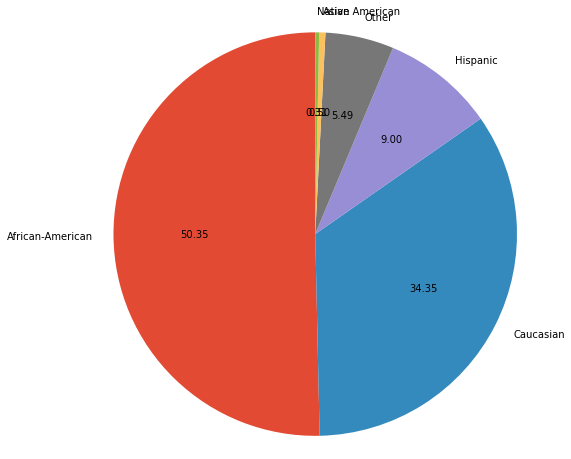

In [ ]:
import matplotlib.pyplot as plt
#dict 'race' is sreated for distribution of race feature
race = raw_data['race'].value_counts().to_dict()
#label: type of race
label = []
#count: number of people of that race
count = []

for i in race.items():
  #values are stored in count, label using race dict 
  label.append(i[0])
  count.append(i[1])

plt.style.use(['ggplot'])
plt.figure(figsize=(8,8))
plt.pie(count, labels = label, autopct='%1.2f', startangle=90)
plt.axis('equal')
plt.show()

The dataset has an imbalanced class distribution with almost 50% of defendants as African-Americans and only 0.3% of Native Americans

(array([3.253e+03, 2.088e+03, 1.233e+03, 8.260e+02, 5.780e+02, 4.610e+02,
        3.450e+02, 3.100e+02, 2.540e+02, 2.130e+02, 1.570e+02, 1.360e+02,
        1.050e+02, 1.100e+02, 8.200e+01, 6.700e+01, 5.900e+01, 5.200e+01,
        4.300e+01, 4.300e+01, 2.800e+01, 2.400e+01, 2.300e+01, 2.400e+01,
        1.700e+01, 1.300e+01, 1.100e+01, 1.000e+01, 8.000e+00, 7.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 43 Patch objects>)

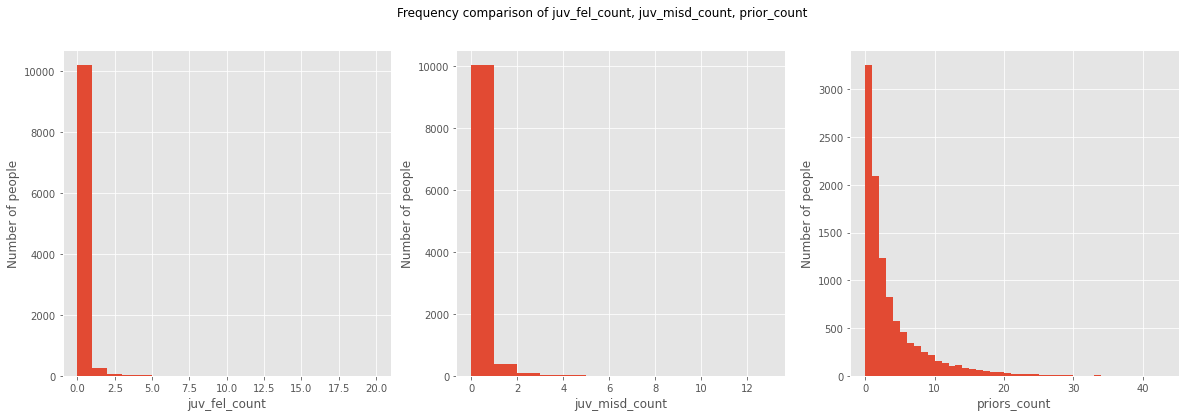

In [ ]:
'''Below code is used to compare the features juv_fel_count, juv_misd_count, priors_count
by plotting histograms for each feature against "Number of People"'''

plt.style.use(['ggplot'])
fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize = (20,6))
fig.suptitle('Frequency comparison of juv_fel_count, juv_misd_count, prior_count')
#fel, misd, pri store respective number of counts from each data example 
fel = []
misd = []
pri = []
for i,j,k in zip(raw_data['juv_fel_count'], raw_data['juv_misd_count'], raw_data['priors_count']):
  fel.append(i)
  misd.append(j)
  pri.append(k)
arr1 = range(max(fel)+1)
arr2 = range(max(misd)+1)
arr3 = range(max(pri)+1)

axs1.set_xlabel('juv_fel_count')
axs1.set_ylabel('Number of people')
axs1.hist(fel, arr1)
axs2.set_xlabel('juv_misd_count')
axs2.set_ylabel('Number of people')
axs2.hist(misd, arr2)
axs3.set_xlabel('priors_count')
axs3.set_ylabel('Number of people')
axs3.hist(pri, arr3)

Above graph depicts that majority of the defendants have a juv_fel_count and juv_misd_count zero and few hundereds have a count of two or more whereas prior_counts has a wider distribution over the population  

In [ ]:
raw_data.age_cat.value_counts()

25 - 45            6046
Greater than 45    2328
Less than 25       2224
Name: age_cat, dtype: int64

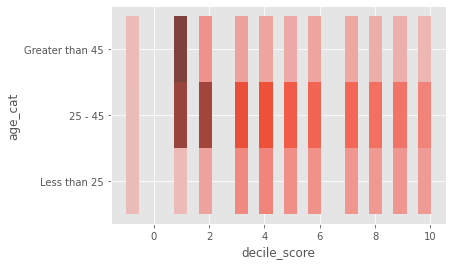

In [ ]:
import seaborn as sns
sns.histplot(x='decile_score', y="age_cat", data = raw_data)

Majority of people in the age_cat **Greater than 45** are having a lower score as compared to age_cat **25-45** who have the highest number of defendants in each category of decile score 

In [ ]:
raw_data.is_recid.value_counts()

0    6848
1    3750
Name: is_recid, dtype: int64

Number of people who did not recidivate are almost double than the recidivists

(0.0, 6.0)

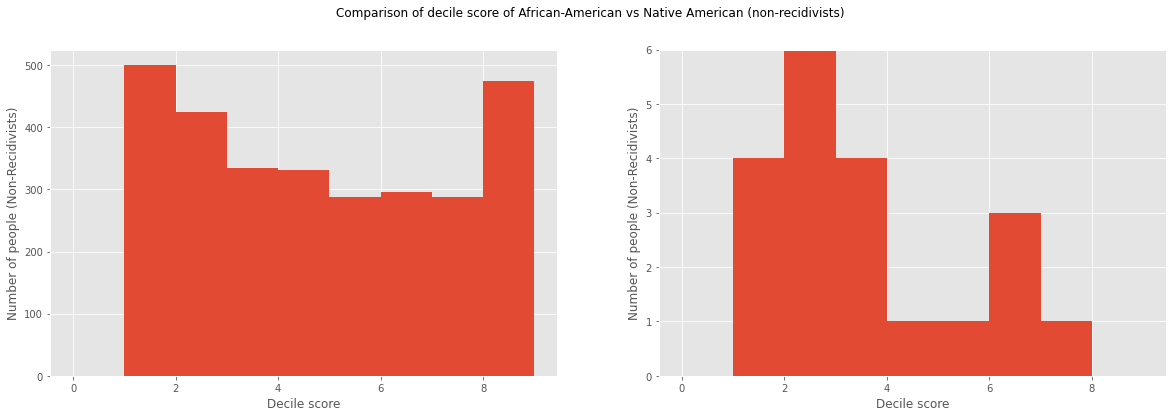

<Figure size 576x288 with 0 Axes>

In [ ]:
'''Below code is used to compare the decile score for African-Americans and Native Americans 
   against number of people who did not recidivated using histogram plots'''
plt.style.use(['ggplot'])

fig, (axs1,axs2) = plt.subplots(1,2, figsize = (20,6))
fig.suptitle('Comparison of decile score of African-American vs Native American (non-recidivists)')
decile_af = []
decile_am = []

for i,j,k in zip(raw_data['race'], raw_data['is_recid'], raw_data['decile_score']):
  if i == 'African-American' and j == 0:
    decile_af.append(k)
  elif i == 'Native American' and j == 0:
    decile_am.append(k)

plt.figure(figsize=(8,4))
arr_af = range(max(decile_af))
arr_am = range(max(decile_am))
axs1.hist(decile_af, arr_af)

axs1.set_xlabel('Decile score')
axs1.set_ylabel('Number of people (Non-Recidivists)')
axs2.hist(decile_am, arr_am)
axs2.set_xlabel('Decile score')
axs2.set_ylabel('Number of people (Non-Recidivists)')
axs2.set_ylim(bottom = 0, top = 6)

The above graph has decile score on x-axis and number of people who **did not** recidivate for the particular score assigned. A clear bias is visible from the above graph against Africa-Americans, those who did not recidivate are consistently assigned higher scores in contrast to Native Americans where number of people decline as the score increases in-fact there are no Native Americans in this case with score higher than six. The difference in scale of y-axis is because of the small number of Native Americans in the dataset

In [ ]:
from datetime import datetime
def date_from_str(s):
    return datetime.strptime(s, '%d/%m/%Y %H:%M')

In [ ]:
raw_data['length_of_sentence'] = (raw_data['c_jail_out'].apply(date_from_str) - raw_data['c_jail_in'].apply(date_from_str)).dt.total_seconds()

In [ ]:
import matplotlib.pyplot as plt
raw_data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,decile_score,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid
decile_score,1.0,0.1788,0.2055,0.1807,0.4405,0.3008
juv_fel_count,0.1788,1.0,0.08754,0.06243,0.1845,0.07715
juv_misd_count,0.2055,0.08754,1.0,0.291,0.2456,0.1103
juv_other_count,0.1807,0.06243,0.291,1.0,0.1081,0.1037
priors_count,0.4405,0.1845,0.2456,0.1081,1.0,0.2499
is_recid,0.3008,0.07715,0.1103,0.1037,0.2499,1.0


Of all the features "priors_count" is the highest co-related feature to is_recid. Another interesting co-raltion is of "length_of_stay" which has a weak negative co-relation to is_recid feature.  

# RENAMING CHARGE DESCRIPTIONS


---



In [ ]:
def drug_charges(data):
  '''drug_charges function is used to change the charge labels related to drug charges to a common name Possession of drugs.
  Some of the charges which have keywords common to other charges are also excluded from the data by using .(contains(str)==False) function'''
  
  #Pos is the most common key word in all drug related charges eg: "Possession of cocaine" 
  
  mod_df = data.loc[(data.c_charge_desc.str.startswith('Pos', na=False))]
  mod_df = mod_df[['c_charge_desc']].copy()
  
  #Charges to which keyword pos is common are removed from the data frame mod_df

  mod_df = mod_df.loc[mod_df['c_charge_desc'].str.contains('Burglary|Tools|Wep|Conv|Felo|Firearm|Id|Driver|Credit|Countrfeit|Shoplifting|child') == False]
  mod_df = mod_df['c_charge_desc'].tolist()
  #charge_desc in mod_df are replaced with charge "Possession of drugs"

  data['c_charge_desc'].replace(to_replace = mod_df, value = 'Possession of drugs', inplace = True)
  
  return data

In [ ]:
def battery_charges(data):
  '''battery_charges function is used to change the charge labels related to battery charges to common names related to different types of battery charges
  eg. aggrravated battery, felony battery etc.'''
  
  #keyword: words used to identify charge uniquely
  #label: alternate labels for corresponding charge descriptions

  keyWord = ['Harm', 'Agg', 'Burg', 'sex|lewd', 'felony', 'off']
  label = ['Battery causing body harm', 'Aggravated Battery', 'Burglary charge', 'sex Battery', 'felony Battery', 'Battery on an official']
  
  #Iterates over both keyword and label to change charge descriptions
  for i,j in zip(keyWord, label):
    mod_df = data.loc[data.c_charge_desc.str.contains('Batt', na=False, case = False)]
    mod_df = mod_df[['c_charge_desc']].copy()
    mod_df = mod_df.loc[mod_df.c_charge_desc.str.contains(i, na=False, case = False)]
    mod_df = mod_df['c_charge_desc'].tolist()
    data['c_charge_desc'] = data['c_charge_desc'].replace(to_replace = mod_df,
                      value = j)
  #Rest of the battery charges not falling in above labels are simply labeled as "Battery"
  mod_df = data.loc[data.c_charge_desc.str.contains('Batt', na=False, case = False)]
  mod_df = mod_df[['c_charge_desc']].copy()
  mod_df = mod_df.loc[mod_df['c_charge_desc'].str.contains('official|felony|sex|Harm|Aggravated') == False]
  mod_df = mod_df['c_charge_desc'].tolist()
  data['c_charge_desc'] = data['c_charge_desc'].replace(to_replace = mod_df,
                      value = 'Battery')

  return data

In [ ]:
def common_charges1(data):
  '''common_charges1 function iterates over the list keyWord and replaces all the charges containing the particular keyword(s) with the corresponding label'''

  #keyword: words used to identify charge uniquely
  #label: alternate labels for corresponding charge descriptions
  

  keyWord = ['Del|Sel|Purchas|Traffick', 'Burglary|Burg', 'Assault', 'Fraud|Imperson', 'Grand Theft', 'Petit|Theft', 'Tres', 'Rob', 'Crim', 'Child|Minor', 'Tamper|fabric', 
          'Wep|Firearm|weapon', 'soli|prosti|traf', 'leav|acc', 'lewd|sex', 'Murd', 'fle|elude|leo|Escape', 'stolen', 'stalk', 'dom', 'stalk']

  label = ['Dealing in drugs', 'Burglary charge', 'Assault', 'Fraud', 'Grand Thfet', 'Petit Theft', 'Tresspassing', 'Robbery', 'Criminal Mischief', 'Child Abuse (Vol/Non-Vol/Sexual)', 
          'Tampering evidence/Victim', 'Possession of Weapon', 'Solicitaion', 'Leave scene of accident', 'Lewd or Lascivious Molestation', 'Murder/Attemp to Murder', 'Fleeing or attempt to elude', 
          'Dealing in stolen property', 'Viol Injunct Domestic Violence', 'Stalking (Viol Injunct/Aggr)']

  #Iterates over KeyWords and labels to replace the c_charge_desc value with labels provided above 

  for i,j in zip(keyWord,label):
   mod_df = data.loc[data.c_charge_desc.str.contains(i, na=False, case = False)]
   mod_df = mod_df[['c_charge_desc']].copy()
   mod_df = mod_df['c_charge_desc'].tolist()
   data['c_charge_desc'] = data['c_charge_desc'].replace(to_replace = mod_df,
                      value = j)
  return data

In [ ]:
def common_charges2(data):

  #keyword1: words used to identify charge uniquely
  #KeyWord2: words which share keywords common to the charges mentioned in the list "KeyWord1" and 
  #          must be excluded from the set of charges to be replaced  
  #label: alternate labels for corresponding charge descriptions

  keyWord1 = ['Driv|Lic|DL|DWL', 'Id|Invalid|Insurance', 'fail|pay|Pay', 'school|instui|edu', 'Obstruct']

  keyWord2 = ['Beverage|Solic|Prosti|Public', 'accident|Ride|Kidnapping|Escape|evidence', 'Carrer|Load|Secur|Career|Summons|Vehicle', 'Carrer|Load|Secur|Career|Summons|Vehicle', 'Fire|Resist']
  
  label = ['Driving', 'Possession/Use of false name/Identity', 'Failure to Pay conveyance charge', 'Disrupting school/Education Instui', 'Resist Officer w/Violence']
  
  #Iterates over KeyWords and labels to replace the c_charge_desc value with labels provided above 

  for i,j,k in zip(keyWord1, keyWord2, label):
    mod_df = data.loc[data.c_charge_desc.str.contains(i, na=False, case = False)]
    mod_df = mod_df[['c_charge_desc']].copy()
    mod_df = mod_df.loc[mod_df['c_charge_desc'].str.contains(j) == False]
    mod_df = mod_df['c_charge_desc'].tolist()
    data['c_charge_desc'] = data['c_charge_desc'].replace(to_replace = mod_df,
                      value = k)
  return data

In [ ]:
def common_charges3(data):

  #keyword: words used to identify charge uniquely
  #label: alternate labels for corresponding charge descriptions

  keyWord = ['bill', 'elder|adult', 'DUI|D.U.I', 'alcohol', 'animal', '911', 'shop|shoplifting', 'forge|card|bill|check', 'Harm public servant', 'abuse without', 
             'attnd|attend', 'Resisting W/O Violence', 'Obstruct', 'Tag', 'shoot|Throw Missile Into Pub/Priv Dw|Throw in occupied dwell', 'sound']

  label = ['Forging bills', 'Abuse elderly', 'DUI', 'Alcoholic Beverage Violation-FL', 'Animal cruelty', 'Misuse Of 911', 'Poss/Use Anti-Shoplifting Device', 'Uttering/Poss a Forged Instrument', 'Resist Officer w/Violence', 'Resist/Obstruct W/O Violence', 
           'Compulsary attendence violation', 'Resist/Obstruct W/O Violence', 'Resist Officer w/Violence', 'Misuse/alter dealer tag', 'Shoot into vehicle/dwell', 'Lewd or Lascivious Molestation', 'Unauth C/P/S Sounds']
    
  #Iterates over KeyWords and labels to replace the c_charge_desc value with labels provided above 
  
  for i,j in zip(keyWord, label):
   mod_df = data.loc[data.c_charge_desc.str.contains(i, na=False, case = False)]
   mod_df = mod_df[['c_charge_desc']].copy()
   mod_df = mod_df['c_charge_desc'].tolist()
   data['c_charge_desc'] = data['c_charge_desc'].replace(to_replace = mod_df,
                      value = j)
  return data

In [ ]:
def change_label(data):
  '''The change_label function calls the following sub-routines in a particular order since the charge labels in 
  c_charge_desc contain many common keywords therefore the order must not be changed inorder to get correct results'''

  data = drug_charges(data)
  data = battery_charges(data)
  data = common_charges1(data)
  data = common_charges2(data)
  data = common_charges3(data)
  return data

In [ ]:
#raw-data is sent to change_label function for re-labeling of c_charge_desc.

data = change_label(raw_data) 
data.head()

,age_cat,sex,race,decile_score,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid
0,Greater than 45,Male,Other,1,0,0,0,0,(F3),Assault,0
3,25 - 45,Male,African-American,3,0,0,0,0,(F3),felony Battery,1
4,Less than 25,Male,African-American,4,0,0,1,4,(F3),Possession of drugs,1
9,Less than 25,Male,African-American,8,0,1,0,1,(F3),Possession of drugs,0
10,25 - 45,Male,Other,1,0,0,0,2,(F7),arrest case no charge,0


Data frame **data** has all the re-labeled charge descriptions after pre-processing

# CHARGES WITH HIGHEST COUNT


---



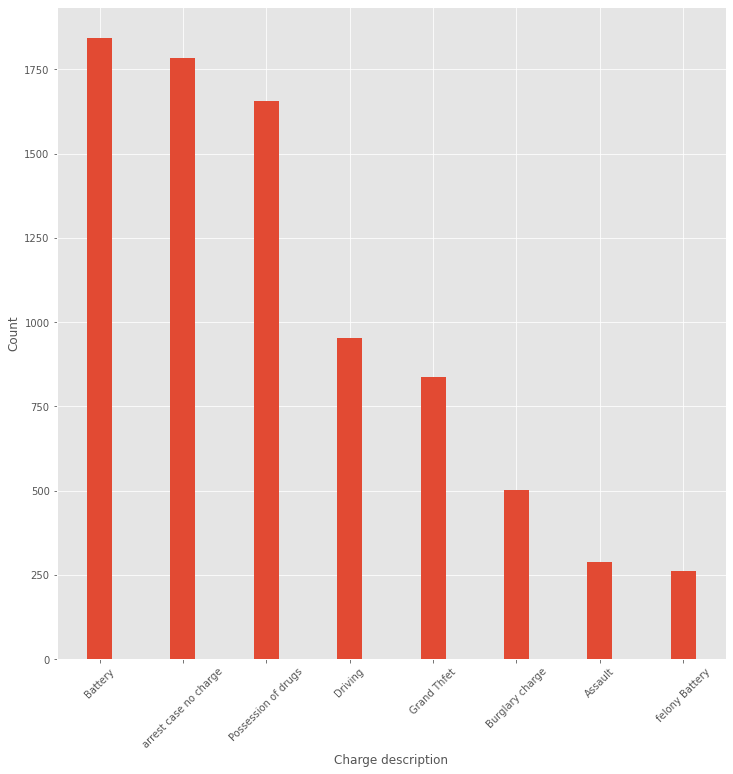

In [ ]:
#Below code selects top 10 most common charges from the c_charge_desc and visualizes it as bar graphs.
plt.style.use(['ggplot'])
charge_dict = data['c_charge_desc'].value_counts().to_dict()
charge_dict = sorted(charge_dict.items(), key=lambda s: (s[1]), reverse = True)
cnt = 1
charge = []
count = []
for i in charge_dict:
  if cnt<=8:
    charge.append(i[0])
    count.append(i[1])
    cnt+=1
  else:
    break
plt.figure(figsize=(12,12))
plt.bar(charge, count, width=0.3)
plt.xticks(rotation=45) 
plt.xlabel('Charge description')
plt.ylabel('Count')
plt.show()

The above graph shows the most common charges in the dataset

# ADDING FEATURE (Charge_cat)

---



A new feature **charge_cat** is to be added based on the labels of c_charge_desc which will contain the following ctegories


1.   Violent crime
2.   Non-Violent crime
3.   Drug charges

In order to maintain consistency, charge_cat feature is added to both the pre-processed dataset and raw dataset, and also to provide better labeling of charge_cat both the datasets are used beacause the c_charge_desc in pre-processed dataset are more generalized during pre-processing.  


In [ ]:
#New feature charge_cat is created
data['charge_cat'] = ""
#List of common key words found in violent charges are stored as 
keyWord = 'Aggr|Robb|threat|kidnap|armed|wep|murder|domes|abuse|damage|injury|assault|Harass|molestation|violence|shoot|lewd|cruel|felony battery|Aggravated battery|Battery on official'
data.head()

,age_cat,sex,race,decile_score,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,charge_cat
0,Greater than 45,Male,Other,1,0,0,0,0,(F3),Assault,0,
3,25 - 45,Male,African-American,3,0,0,0,0,(F3),felony Battery,1,
4,Less than 25,Male,African-American,4,0,0,1,4,(F3),Possession of drugs,1,
9,Less than 25,Male,African-American,8,0,1,0,1,(F3),Possession of drugs,0,
10,25 - 45,Male,Other,1,0,0,0,2,(F7),arrest case no charge,0,




---


New features are added to both data, raw_data and initialized to None. A list of common keywords that appear in violent crimes is made and stored in a string variable with an or operator '|'

We pass the string "keyWord" to both pre-processed and raw dataset and the corresponding charges are labeled as Violent crimes. The columns for both the datasets are then made equal so that none of the charges are missed in any of the dataset as the charge decriptions were renamed in dataframe "data"

In [ ]:
def violent_crime(df):
  '''violent_crime function is used to label all the charges with the words in the keyWord string with violent crime and
  it is used for both raw data and pre-processed data'''
  
  mod_df = df.loc[df.c_charge_desc.str.contains(keyWord, na=False, case = False)]
  mod_df = mod_df['c_charge_desc'].tolist()
  df['charge_cat'] = df.apply(lambda x: 'Violent crime' if x.c_charge_desc in mod_df else x.charge_cat, axis = 1)
  return df

In [ ]:
def violent_crime_raw(df):
  '''violent_crime_raw is used to label charges left after running violent_crime(df) function'''
  
  mod_df = df.loc[df.c_charge_desc.str.contains('batt|flee|elude', na=False, case = False)]
  mod_df = mod_df.loc[mod_df.c_charge_desc.str.contains('Assault|Agg|Armed|harm|wep|felony|burg', na=False, case = False)]
  mod_df['c_charge_desc'].tolist()
  df['charge_cat'] = df.apply(lambda x: 'Violent crime' if x.c_charge_desc in mod_df else x.charge_cat, axis = 1)
  return df

In [ ]:
def drug_charge(df):
  '''Assigns category to charges: possesion of drugs, dealing in drugs and manufacture of cannabis as "Drug charges" '''

  mod_df = df.loc[df.c_charge_desc.str.contains('Possession of drugs|Dealing in drugs|Manufacure cannabis', na=False, case = False)]
  mod_df = mod_df['c_charge_desc'].tolist()
  df['charge_cat'] = df.apply(lambda x: 'Drug charges' if x.c_charge_desc in mod_df else x.charge_cat, axis = 1)
  return df

In [ ]:
def non_violent(df):
  '''Assigns category as non-violent charges to the rest of the charges'''
  
  df['charge_cat'] = df.apply(lambda x: 'Non-violent crime' if x.charge_cat is "" else x.charge_cat, axis = 1)
  return df 

In [ ]:
#Function calls to assign category to charges in raw_data

raw_data = violent_crime(raw_data)
raw_data = violent_crime_raw(raw_data)

data['charge_cat'] = raw_data['charge_cat']

#Function calls to assign category to charges in data

data = violent_crime(data)

data = drug_charge(data)
data = non_violent(data)

raw_data['charge_cat'] = data['charge_cat']
data.head(10)

,age_cat,sex,race,decile_score,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,charge_cat
0,Greater than 45,Male,Other,1,0,0,0,0,(F3),Assault,0,Violent crime
3,25 - 45,Male,African-American,3,0,0,0,0,(F3),felony Battery,1,Violent crime
4,Less than 25,Male,African-American,4,0,0,1,4,(F3),Possession of drugs,1,Drug charges
9,Less than 25,Male,African-American,8,0,1,0,1,(F3),Possession of drugs,0,Drug charges
10,25 - 45,Male,Other,1,0,0,0,2,(F7),arrest case no charge,0,Non-violent crime
11,25 - 45,Male,Other,1,0,0,0,0,(M1),Battery,0,Non-violent crime
12,25 - 45,Male,Caucasian,6,0,0,0,14,(F3),Burglary charge,1,Non-violent crime
14,25 - 45,Male,Other,4,0,0,0,3,(F3),arrest case no charge,0,Non-violent crime
17,25 - 45,Female,Caucasian,1,0,0,0,0,(M1),Battery,0,Non-violent crime
18,Less than 25,Male,Caucasian,10,0,0,1,0,(F3),Possession of drugs,0,Drug charges


Charge categories in c_charge_desc were generalised by renaming and in order to avoid misclassification of any of the charges in data, categories are assigned to both raw_data and data and their resukts are merged.

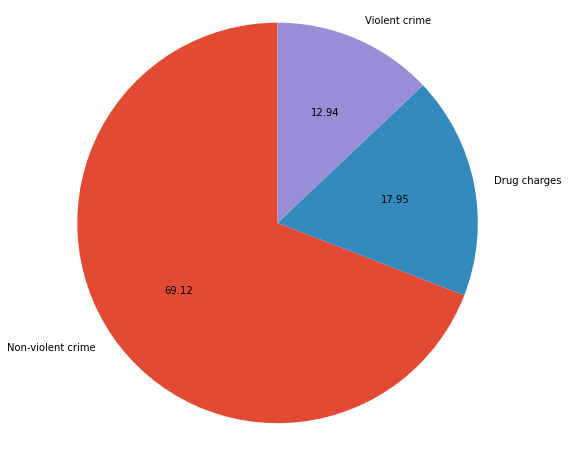

In [ ]:
#dict 'race' is sreated for distribution of race feature
charge_cat = data['charge_cat'].value_counts().to_dict()
#label: type of race
label = []
#count: number of people of that race
count = []

for i in charge_cat.items():
  #values are stored in count, label using race dict 
  label.append(i[0])
  count.append(i[1])

plt.style.use(['ggplot'])
plt.figure(figsize=(8,8))
plt.pie(count, labels = label, autopct='%1.2f', startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
#Separate datasets for input and outout are craeted

inp_data = data[['age_cat', 'sex', 'juv_misd_count', 'juv_other_count', 'juv_fel_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'charge_cat']].copy()
out_data = data[['is_recid']].copy()

#Labels for categorical features in input data frame are binarized below

inp_data = pd.get_dummies(inp_data, columns=['age_cat', 'sex', 'c_charge_degree', 'c_charge_desc', 'charge_cat', 'juv_other_count', 'juv_misd_count', 'juv_fel_count', 'priors_count'])
inp_data.shape

(10598, 185)




Input and output datasets are created by selecting features from processed data. All the categorical features are binarized using sklearn's one hot vector encoding where these features are converted into boolean vectors. 

In [ ]:
data.to_pickle(r"/gdrive/My Drive/data.pkl")
inp_data.to_pickle(r"/gdrive/My Drive/inp_data.pkl")
out_data.to_pickle(r"/gdrive/My Drive/out_data.pkl")







Three datasets are namely data, inp_data, out_data are pickled and saved in google drive

# Drop Charge Descriptions

A new dataset is created where instead of using charges description and categorie only charge categorie is used to check if a better generalization is possibile on using only the nature of the crime instead of both description and it's nature.

In [ ]:
#Separate datasets for input and outout are created without including charge descriptions

drop_desc = data[['age_cat', 'sex', 'juv_misd_count', 'juv_other_count', 'juv_fel_count', 'priors_count', 'c_charge_degree', 'charge_cat']].copy()

#Labels for categorical features in input data frame are binarized below

drop_desc = pd.get_dummies(drop_desc, columns=['age_cat', 'sex', 'c_charge_degree', 'charge_cat', 'juv_other_count', 'juv_misd_count', 'juv_fel_count', 'priors_count'])
drop_desc.shape

(10598, 94)

In [ ]:
drop_desc.to_pickle(r"/gdrive/My Drive/drop_desc.pkl")

# SPLIT DATASET ACC. TO RACE


---


The following metod is suggested in: Calders, Toon, and Sicco Verwer. "Three naive
Bayes approaches for discrimination-free
classification."

According to which one of the methods to remove bias towards protected groups is to analyze them seperately. 

In [ ]:
#TODO: Split the dataset according to the race  
Afr_data = data[data.race == 'African-American']
Nat_Ameri_data = data[data.race == 'Native American']
Afr_data.head()

,age_cat,sex,race,decile_score,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,charge_cat
3,25 - 45,Male,African-American,3,0,0,0,0,(F3),felony Battery,1,Violent crime
4,Less than 25,Male,African-American,4,0,0,1,4,(F3),Possession of drugs,1,Non-violent crime
9,Less than 25,Male,African-American,8,0,1,0,1,(F3),Possession of drugs,0,Non-violent crime
26,Less than 25,Male,African-American,6,0,0,0,3,(M1),Battery,1,Non-violent crime
29,25 - 45,Male,African-American,4,0,0,0,0,(F3),Possession of drugs,0,Non-violent crime


In [ ]:
#Seperate input and output datasets are created for both African-American
Afr_inp_data = Afr_data[['age_cat', 'sex', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'charge_cat']].copy()
Afr_out_data = Afr_data[['is_recid']].copy()

In [ ]:
#Categorical variables are binarized from both the datasets created
Afr_inp_data = pd.get_dummies(Afr_inp_data, columns=['age_cat', 'sex', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'charge_cat'])

In [ ]:
Afr_inp_data.to_pickle(r"/gdrive/My Drive/Afr_inp_data.pkl")
Afr_out_data.to_pickle(r"/gdrive/My Drive/Afr_out_data.pkl")